https://thecleverprogrammer.com/2020/07/02/logistic-regression-in-machine-learning-with-python/

**LOGISTIC REGRESSION**

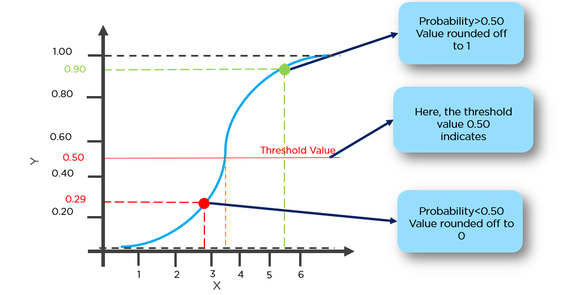

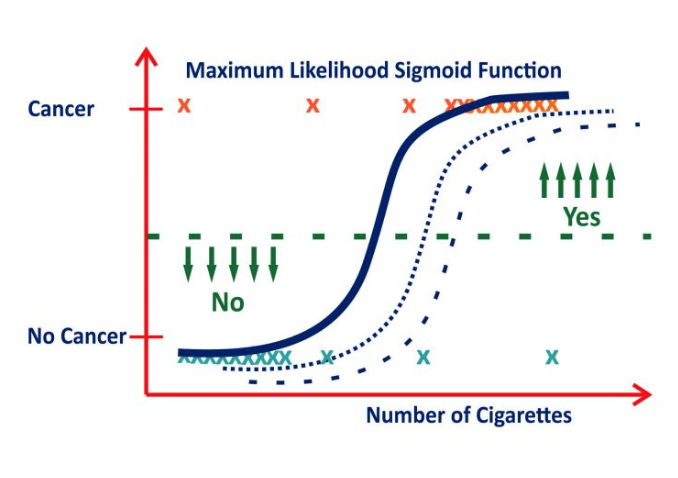

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# Tenemos 1797 imagenes (Imagenes 8x8 dimension 64)
print("Image Data Shape" , digits.data.shape)
# Tenemos 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


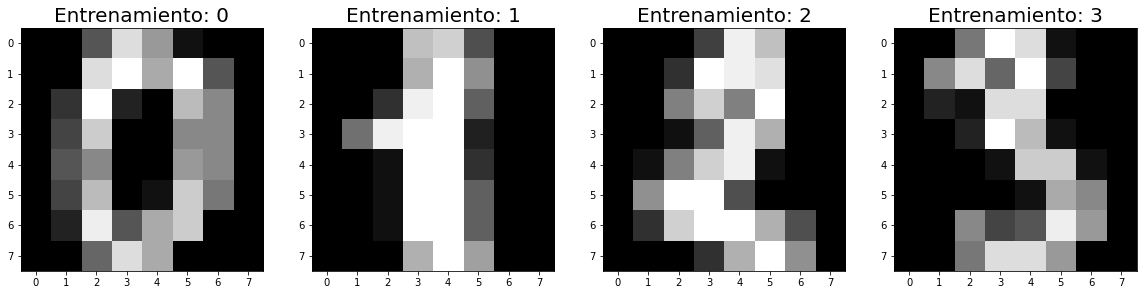

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
#print(digits.data[3])
#print(digits.target[5])
for index, (image, label) in enumerate(zip(digits.data[0:4], digits.target[0:4])):
  plt.subplot(1, 4, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Entrenamiento: %i' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, test_size=0.25, 
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regresionLogistica = LogisticRegression(solver='lbfgs', max_iter=5000) #Algoritmo de optimizacion de segundo orden

In [ ]:
regresionLogistica.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
# Retorna un NumPy Array
# Prediccion para una observacion (image)
regresionLogistica.predict(x_test[0].reshape(1,-1))
regresionLogistica.predict(x_test[0:10])
predictions = regresionLogistica.predict(x_test)

**Midiendo la Acccuracy de nuestro modelo de regresión logística**

Accuracy se define como la fracción de predicciones correctas, esto es predicciones correctas/número total de puntos de datos.

In [ ]:
# Usamos score para obtener la accuracy del modelo
training_score = regresionLogistica.score(x_train, y_train)
print(training_score)
score = regresionLogistica.score(x_test, y_test)
print(score)

1.0
0.9533333333333334


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


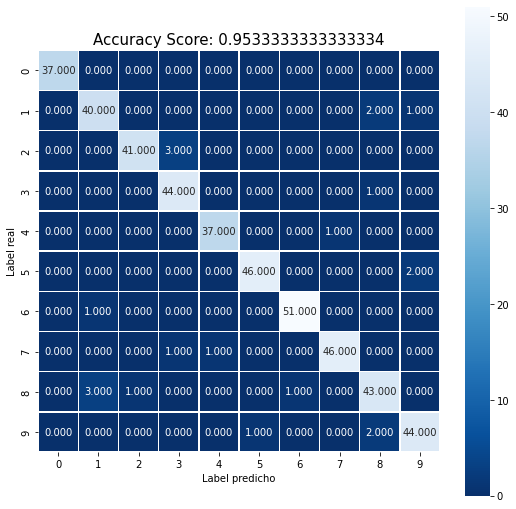

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Label real');
plt.xlabel('Label predicho');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

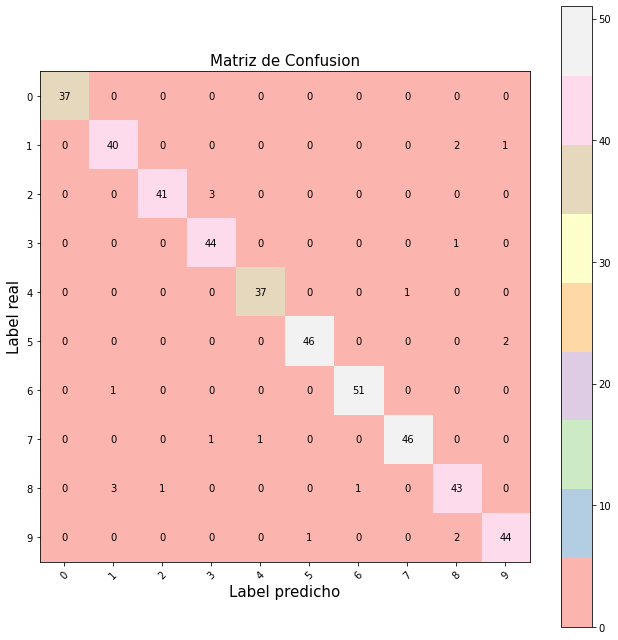

In [ ]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Matriz de Confusion', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Label real', size = 15)
plt.xlabel('Label predicho', size = 15)
width, height = cm.shape
for x in range(width):
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



**Usando MNIST Dataset**

In [ ]:
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
# Hay 70,000 imagenes (Imagenes 28 por 28 con dimension 784)
print(X.shape)
# Las etiquetas
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 X, y, test_size=1/7.0, random_state=0)

7


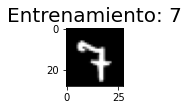

3


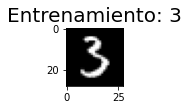

0


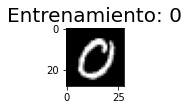

1


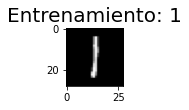

2


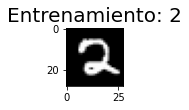

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  fig = plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  print(label)
  plt.title('Entrenamiento: %s' % label, fontsize = 20)
  plt.show()

In [95]:
from sklearn.linear_model import LogisticRegression

# Todos los paraemtros no especificados se setean con sus valores default
# default solver es muy lento y lo cambiamos por lbfgs
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=5000)

logisticRegr.fit(train_img, train_lbl)
# Retorna un  NumPy Array
# Prediccion para una observacion (image)
logisticRegr.predict(test_img[0].reshape(1,-1))
logisticRegr.predict(test_img[0:10])
predictions = logisticRegr.predict(test_img)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
